In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/startup.csv')

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
cols = df.columns
df.rename(columns = { cols[1] : 'Date', 'Startup Name' : 'Name', cols[-2] : 'Amount' }, inplace=True)
df.drop(columns=[cols[0], cols[-1]], inplace=True)

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.head()

,Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount
Date,,,,,,,
09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 09/01/2020 to 31/01/2015
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               3044 non-null   object
 1   Industry Vertical  2873 non-null   object
 2   SubVertical        2108 non-null   object
 3   City  Location     2864 non-null   object
 4   Investors Name     3020 non-null   object
 5   InvestmentnType    3040 non-null   object
 6   Amount             2084 non-null   object
dtypes: object(7)
memory usage: 190.2+ KB


In [8]:
df.isna().sum()

Name                   0
Industry Vertical    171
SubVertical          936
City  Location       180
Investors Name        24
InvestmentnType        4
Amount               960
dtype: int64

In [9]:
df['Amount'].fillna('0', inplace=True)

In [10]:
df['Amount'] = df['Amount'].str.replace(',', '')
df['Amount'] = df['Amount'].str.strip('+')

In [11]:
toremove = df.loc[df['Amount'].str.contains('a', na=True)]

In [12]:
df.drop(toremove.index, inplace=True)

In [13]:
df['Amount'].replace(['undisclosed'],'0', inplace=True)
df['Amount'].replace(['unknown'],'0', inplace=True)
df['Amount'].replace(['Undisclosed'],'0', inplace=True)

In [14]:
df['Amount'] = df['Amount'].astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3028 entries, 09/01/2020 to 31/01/2015
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3028 non-null   object 
 1   Industry Vertical  2857 non-null   object 
 2   SubVertical        2108 non-null   object 
 3   City  Location     2848 non-null   object 
 4   Investors Name     3004 non-null   object 
 5   InvestmentnType    3024 non-null   object 
 6   Amount             3028 non-null   float64
dtypes: float64(1), object(6)
memory usage: 189.2+ KB


In [24]:
df.sort_values('Amount', ascending=False).head(2)

,Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount
Date,,,,,,,
27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09
11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09


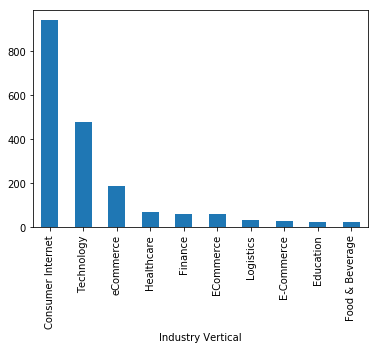

In [34]:
df.groupby('Industry Vertical').count().sort_values('Name', ascending = False).head(10)['Name'].plot(kind="bar")

In [20]:
df.groupby('Investors Name').count()

,Name,Industry Vertical,SubVertical,City Location,InvestmentnType,Amount
Investors Name,,,,,,
"""Kedaraa Capital, Ontario Teachers\\'""",1,1,1,1,1,1
"021 Capita, Binny Bansal",1,1,1,1,1,1
1Crowd,2,2,2,2,2,2
1Crowd (through crowd funding),1,1,1,1,1,1
1Crowd (through crowdfunding),1,1,1,1,1,1
...,...,...,...,...,...,...
"ru-Net, Sequoia Capital,\\xc2\\xa0 Lightbox Ventures",1,1,0,1,1,1
undisclosed investor,3,3,2,3,3,3
undisclosed investors,11,11,11,11,11,11


In [22]:
df['Investors Name'].str.startswith('undisclosed').sum()

15